In [201]:
#import the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [202]:
#data for employees

data = {
    "Employee ID" : [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116],
    "Name" : ["Aaron", "Brad", "Bridgette", "Nicole", "Clint", "Deb", "Amber", "Drew", "Oscar", "Terry", "Trick", "Harold", "Joey", "Nico", "Pickles", "Ruby"],
    "Department" : ["Server", "Server", "Server", "Server", "Barstaff", "Barstaff", "FOH", "FOH", "FOH", "FOH", "FOH", "Kitchen", "Kitchen", "Kitchen", "Kitchen", "Kitchen"],
    "Salary" : [74000, 91000, 68000, 96000, 97000, 102000, 54000, 63000, 61000, 83000, 78000, 58000, 88000, 64000, 64000, 60000],
    "Gender" : ["Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female"],
    "Yrs of Employment" : [2, 7, 3, 6, 4, 9, 3, 9, 4, 11, 1, 6, 7, 4, 4, 3]
}

In [203]:
#create the dataframe

df = pd.DataFrame(data)
df

,Employee ID,Name,Department,Salary,Gender,Yrs of Employment
0,101,Aaron,Server,74000,Male,2
1,102,Brad,Server,91000,Male,7
2,103,Bridgette,Server,68000,Female,3
3,104,Nicole,Server,96000,Female,6
4,105,Clint,Barstaff,97000,Male,4
5,106,Deb,Barstaff,102000,Female,9
6,107,Amber,FOH,54000,Female,3
7,108,Drew,FOH,63000,Male,9
8,109,Oscar,FOH,61000,Male,4
9,110,Terry,FOH,83000,Male,11


  Department  Salary
0   Barstaff  199000
1        FOH  339000
2    Kitchen  334000
3     Server  329000


<Axes: title={'center': 'Salary by Department'}, ylabel='Salary'>

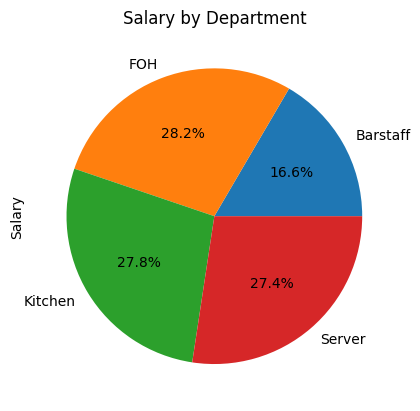

In [216]:
#grouped departments by sum of salary

grouped_dept = df.groupby("Department").agg({"Salary" : "sum"})
grouped_dept = grouped_dept.reset_index()
print(grouped_dept)

#Plot 1 is Pie chart of grouped departments by sum of salary in pandas

pie_plot = grouped_dept.plot(kind="pie",
                  y="Salary",
                  labels=grouped_dept["Department"],
                  title="Salary by Department",
                  autopct="%1.1f%%",
                  legend=False
                  )
pie_plot

<Axes: title={'center': 'Salary by Employee'}, xlabel='Name of Employee', ylabel='Salary (USD)'>

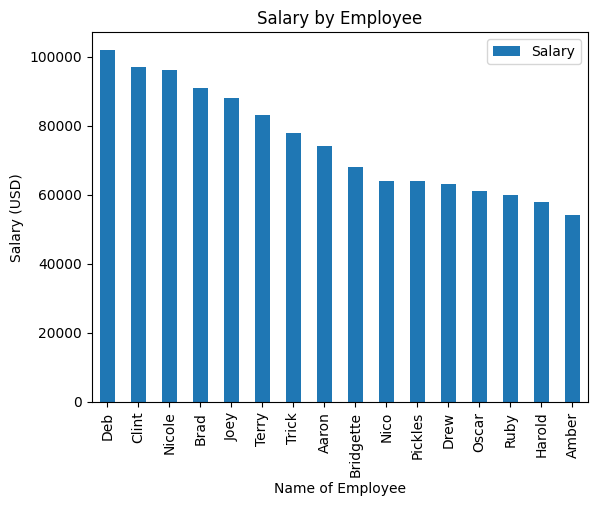

In [205]:
#Sort employees by salary in decending order

decending_salary = df.sort_values(by="Salary", ascending=False)

#Plot 2 is Bar chart of all employees salaries in decending order in pandas

bar_plot = decending_salary.plot(kind="bar", x="Name", y="Salary", title="Salary by Employee",)
bar_plot.set_xlabel("Name of Employee")
bar_plot.set_ylabel("Salary (USD)")
bar_plot

<Axes: title={'center': 'Years of Employment'}, xlabel='Years of Employment', ylabel='Number of Employees'>

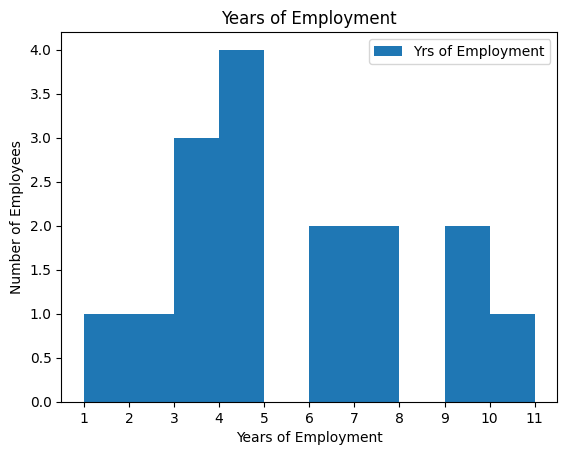

In [206]:
#Plot 3 is Histogram of number of employees per year of employment in pandas

hist_plot = df.plot(kind="hist", x="Name", y="Yrs of Employment", title="Years of Employment")
hist_plot.set_xticks(range(1, 12))
hist_plot.set_xlabel("Years of Employment")
hist_plot.set_ylabel("Number of Employees")
hist_plot

<Axes: xlabel='Salary', ylabel='Department'>

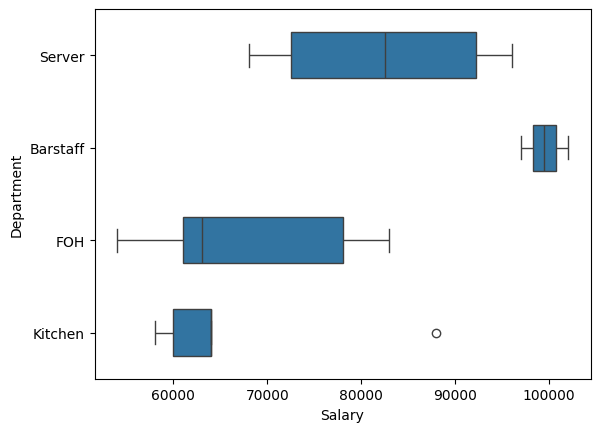

In [207]:
#Plot 4 is a Box plot showing the distribution of the salary by department in seaborn

box_plot = sns.boxplot(x="Salary", y="Department", data=df, width=.5)
box_plot

In [208]:
#Plot 5 is a bar chart of the salary of each employee with hover data showing the salary, department, and years of experience in plotly

#create the plot

fig = px.bar(df,
             x="Name",
             y="Salary",
             hover_name="Name",
             hover_data={"Name": False, "Department": True, "Yrs of Employment": True, "Salary": True},
             title="Salary by Employee (hover for more info)")

#update layout of plot

fig.update_layout(
    xaxis_title="Employee Name",
    yaxis_title="Salary (USD)",
    xaxis_tickangle=-35,
    hoverlabel=dict(font_size=18),
    showlegend=False
)

#show plot

fig.show()

  Department   Salary
0   Barstaff  99500.0
1        FOH  67800.0
2    Kitchen  66800.0
3     Server  82250.0


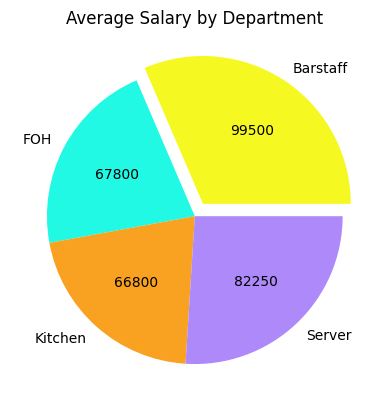

In [212]:
#grouped departments by sum of salary

grouped_dept_mean = df.groupby("Department").agg({"Salary" : "mean"})
grouped_dept_mean = grouped_dept_mean.reset_index()
print(grouped_dept_mean)


#creatiing the lables for the chart

labels = grouped_dept_mean["Department"]
sizes = grouped_dept_mean["Salary"]
colors = ["#f5f921", "#21f9e5", "#f9a121", "#ae89fa"]
explode = (0.1, 0, 0, 0)


#Plot 6 is Pie chart of Average Salary per Employee by Department in matplotlib

plt.Figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct=lambda x: '{:.0f}'.format(x/100*sum(grouped_dept_mean["Salary"])), colors=colors, startangle=360, explode=explode)
plt.title("Average Salary by Department")
plt.show()

  Department  Yrs of Employment
0   Barstaff                6.5
1        FOH                5.6
2    Kitchen                4.8
3     Server                4.5


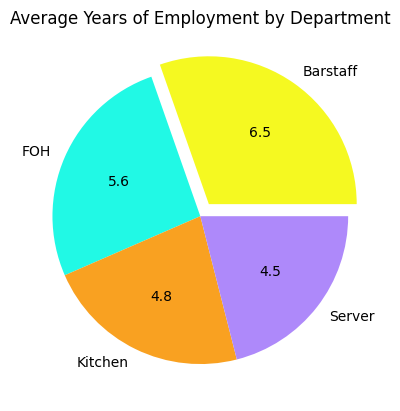

In [213]:
grouped_dept_yrs = df.groupby("Department").agg({"Yrs of Employment" : "mean"})
grouped_dept_yrs = grouped_dept_yrs.reset_index()
print(grouped_dept_yrs)


#creatiing the lables for the chart

labels = grouped_dept_yrs["Department"]
sizes = grouped_dept_yrs["Yrs of Employment"]
colors = ["#f5f921", "#21f9e5", "#f9a121", "#ae89fa"]
explode = (0.1, 0, 0, 0)


#Plot 7 is Pie chart of Average Years of Employment by Department in matplotlib

plt.Figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct=lambda x: '{:.1f}'.format(x/100*sum(grouped_dept_yrs["Yrs of Employment"])), colors=colors, startangle=360, explode=explode)
plt.title("Average Years of Employment by Department")
plt.show()